In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


import os
from pathlib import Path
import time
from collections import OrderedDict, namedtuple

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [3]:
if IN_COLAB:

    from google.colab import drive
    drive.mount('/drive', force_remount=True)
    datadir = '/drive/My Drive/Colab Notebooks/Datasets/'
    optim_dir = datadir + '/optim_dir/'
    results_folder = datadir+'/results/UCI/'
    Path(results_folder).mkdir(parents=True, exist_ok=True)
    Path(optim_dir).mkdir(parents=True, exist_ok=True)
else:
  results_folder = 'results'
  optim_dir = 'optim_dir'
  Path("results").mkdir(parents=True, exist_ok=True)
  Path(optim_dir).mkdir(parents=True, exist_ok=True)


# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

Mounted at /drive


In [4]:
import sys

!pip install category_encoders
import category_encoders as ce

if IN_COLAB:
  
  scripts_dir = '/drive/My Drive/Colab Notebooks/scripts/'
  sys.path.insert(1, scripts_dir)
# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

# insert at 1, 0 is the script path (or '' in REPL)
else:
    sys.path.insert(1, 'scripts')
from geneticalgorithm import geneticalgorithm as ga
import pickle

     |████████████████████████████████| 81kB 3.8MB/s 


In [5]:
# Enable GPU processing
# if IN_COLAB:
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# else:
#     device = torch.device("cpu")
# print(f'Device type: {device}')

In [6]:
# Set random seed
seed = 777
# torch.manual_seed(seed)
model = None

In [7]:
import random
def seeding(SEED):
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    os.environ['TF_CUDNN_DETERMINISTIC'] = str(SEED)
    # tf.random.set_seed(SEED)
    print('seeding done!!!')
seeding(seed)

seeding done!!!


In [8]:
df = pd.read_csv(f"{datadir}UCI/Adult/data.csv")

In [9]:
df.shape
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.shape 

(32561, 15)

In [12]:
df.value_counts

<bound method DataFrame.value_counts of        age workclass  fnlwgt  ... hours.per.week  native.country income
0       90         ?   77053  ...             40   United-States  <=50K
1       82   Private  132870  ...             18   United-States  <=50K
2       66         ?  186061  ...             40   United-States  <=50K
3       54   Private  140359  ...             40   United-States  <=50K
4       41   Private  264663  ...             40   United-States  <=50K
...    ...       ...     ...  ...            ...             ...    ...
32556   22   Private  310152  ...             40   United-States  <=50K
32557   27   Private  257302  ...             38   United-States  <=50K
32558   40   Private  154374  ...             40   United-States   >50K
32559   58   Private  151910  ...             40   United-States  <=50K
32560   22   Private  201490  ...             20   United-States  <=50K

[32561 rows x 15 columns]>

In [13]:
df.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- workclass-----
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----- education-----
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
----- marital.status-----
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
----- occupation-----
Prof-special

In [15]:
df=df.replace("?",np.nan) 

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
df.isnull().sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [18]:
percent_nan = df.isna().sum() * 100 / len(df)
percent_missing_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_nan}).reset_index(drop=True)
percent_missing_df

,column_name,percent_missing
0,age,0.000000
1,workclass,5.638647
2,fnlwgt,0.000000
3,education,0.000000
4,education.num,0.000000
5,marital.status,0.000000
6,occupation,5.660146
7,relationship,0.000000
8,race,0.000000
9,sex,0.000000


In [19]:
df.drop("education",axis=1,inplace=True)  # Education is same as education.num so drop.

In [20]:
from pandas.api.types import CategoricalDtype  
df["education.num"]=df["education.num"].astype(CategoricalDtype(ordered=True)) 
df["education.num"].head(10)

0     9
1     9
2    10
3     4
4    10
5     9
6     6
7    16
8     9
9    10
Name: education.num, dtype: category
Categories (16, int64): [1 < 2 < 3 < 4 ... 13 < 14 < 15 < 16]

In [21]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
for i in ["occupation","workclass","native.country"]:
    df[i].fillna(df[i].mode()[0],inplace=True)      # Fill missing with the most common

In [23]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [24]:
old_df = df.copy()
df = pd.get_dummies(df,columns=["sex","income"],drop_first=True) 

In [25]:
df.rename({"sex_Male":"gender","income_>50K":"income"},axis=1,inplace=True)   # Rename sex to gender and remove te >50k from income

In [26]:
df=pd.get_dummies(df,columns=["workclass","marital.status","occupation","relationship","race","native.country"])  # Use on hot encoding for them

In [27]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,...,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
df.shape

(32561, 89)

In [29]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [30]:
x=df.drop(columns=["income"],axis=1)
x["education.num"]=x["education.num"].astype("int") 

In [31]:
y = df['income']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

In [33]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (22792, 88)
y_train:  (22792,)


In [34]:
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_test:  (9769, 88)
y_test:  (9769,)


In [35]:
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,gender,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
32098,40,31627,13,0,0,20,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25206,39,236391,9,0,0,38,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23491,42,194710,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12367,27,273929,9,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7054,38,99527,14,0,0,40,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Create a class to manage the training / hyperparameter runs
class RunManager():
  def __init__(self):
    self.run_params = None
    self.run_count = 0
    self.run_data = []
    
    #---
    self.results = None

  def begin_run(self, run):
    self.run_params = run
    self.run_count += 1
    

  def end_run(self, train_accuracy, test_accuracy):
    # self.epoch_count = 0
    # train_accuracy = 
    # test_accuracy = 

    print(f'run_params: {self.run_params} Train Acc: {train_accuracy} Test Acc: {test_accuracy}')

    results = OrderedDict()
    results['run'] = self.run_count
    results['train acc'] = train_accuracy
    results['test acc'] = test_accuracy
    
    # ---
    self.results = results

    for k, v in self.run_params.items():
      results[k] = v

    self.run_data.append(results)

  def save_output(self, filename):
    if filename:
      filename = filename
      pd.DataFrame.from_dict(self.run_data, orient='columns').to_csv(f'{filename}.csv')
      
      # with open(f'{filename}.json', 'w', encoding='utf-8') as f:
      #   json.dump(self.run_data, f, ensure_ascii=False, indent=4)

      # print('Results saved to disk')

    return pd.DataFrame.from_dict(self.run_data, orient='columns')


In [37]:
# Define training loop execution
def execution_loop(m, args): # args is given by the optimizer
    agent = {}
    agents = []
    
    agent['n'] = args[0].astype(int)
    agent['m'] = int(args[1])
    agents.append(agent)
#     m = RunManager()
    for run in agents: # this should be one. a particle in pso

        # print(f'Run Params: {run}')

        m.begin_run(run)

        num_predictors = X_train.shape[1]
        if run['m'] <= num_predictors:

          rfc = RandomForestClassifier(n_estimators=run['n'], max_features=run['m'], random_state=42)
          rfc.fit(X_train, y_train)

          y_pred_train = rfc.predict(X_train)
          y_pred_test = rfc.predict(X_test)

          train_score = accuracy_score(y_train, y_pred_train)
          test_score = accuracy_score(y_test, y_pred_test)
        else:
          train_score = 0
          test_score = 0

        m.end_run(train_score, test_score)
    return m.results['test acc']

In [38]:
# Define training run hyperparameters
params = {
    'n' : [1, 200],
    'm' : [1, 20]
}

# params = OrderedDict(
#     lr = [0, 1],
#     batch_size = [20 2000],
#     n_epochs = [3]
# )

In [39]:
m = RunManager()
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = f'Run_Results-UCI-Adult-GA-{timestr}'
# filename = 'Run_Results-PSO-20210504-035642-cont.csv' # this is for trying to continue from last optim save


In [40]:
def run_train_model(agent):
    test_acc = execution_loop(m, agent)
    m.save_output(f'{results_folder}/{filename}')
    print("test acc: ", test_acc)
    return test_acc * -1

run_params: {'n': 31, 'm': 6} Train Acc: 0.9989908739908739 Test Acc: 0.8520831200737026
test acc:  0.8520831200737026
run_params: {'n': 13, 'm': 9} Train Acc: 0.9933309933309933 Test Acc: 0.8480908997850343
test acc:  0.8480908997850343
run_params: {'n': 167, 'm': 18} Train Acc: 1.0 Test Acc: 0.8550516941345071
test acc:  0.8550516941345071
run_params: {'n': 145, 'm': 15} Train Acc: 1.0 Test Acc: 0.8569966219674481
test acc:  0.8569966219674481
run_params: {'n': 54, 'm': 13} Train Acc: 0.9996489996489997 Test Acc: 0.8538233186610708
test acc:  0.8538233186610708
run_params: {'n': 19, 'm': 2} Train Acc: 0.997060372060372 Test Acc: 0.8459412427065206
test acc:  0.8459412427065206
run_params: {'n': 118, 'm': 7} Train Acc: 1.0 Test Acc: 0.8550516941345071
test acc:  0.8550516941345071
run_params: {'n': 197, 'm': 12} Train Acc: 1.0 Test Acc: 0.8568942573446617
test acc:  0.8568942573446617
run_params: {'n': 136, 'm': 11} Train Acc: 1.0 Test Acc: 0.853618589415498
test acc:  0.8536185894154

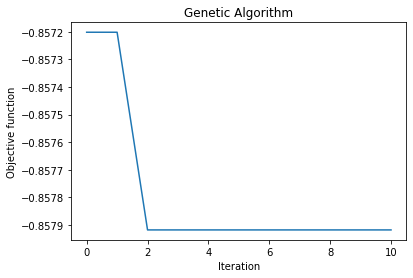

Time to execute: 797.3671 seconds


NameError: ignored

In [41]:
verbose = True
pop_size = 15   
max_iter = 10

obj_func = run_train_model

lb = [params['n'][0], params['m'][0]]
ub = [params['n'][1], params['m'][1]]

algorithm_param = {'max_num_iteration': max_iter,\
                   'population_size':pop_size,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0.3,\
                   'crossover_probability': 0.6,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound = np.array([ [ lb[0], ub[0] ], [ lb[1], ub[1] ] ] )

tic = time.perf_counter() # Start time counter
model=ga(function=obj_func,dimension=2,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param, function_timeout=1000)
model.run(f"{optim_dir}/ga_data-UCI-Adult-{timestr}.data")

toc = time.perf_counter() # End time counter
print(f'Time to execute: {toc - tic:0.4f} seconds')
print(f'Best Position: {[int(x) for x in best_pos1]} Best Solution: {best_fit1:0.5f}')

# m.save_output(f'{results_folder}/{filename}')
# print('Results saved.')
